In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')



In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

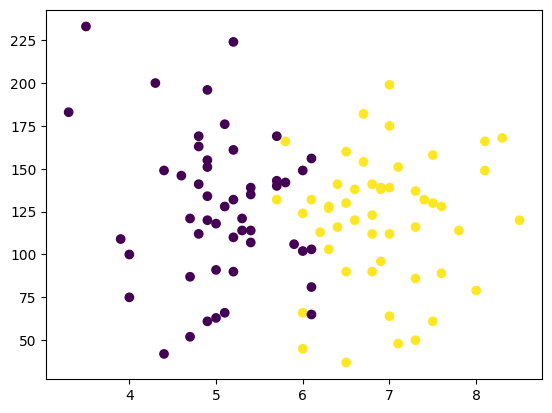

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y.shape

(100,)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
63,6.3,128.0
73,4.9,61.0
39,4.6,146.0
91,7.5,158.0
71,6.1,132.0
...,...,...
44,7.5,61.0
70,6.3,127.0
24,4.7,121.0
7,5.0,63.0


In [15]:
y_train

,placement
63,1
73,0
39,0
91,1
71,1
...,...
44,1
70,1
24,0
7,0


In [16]:
X_test

,cgpa,iq
27,6.0,124.0
97,6.7,182.0
90,7.3,86.0
12,5.4,139.0
14,6.1,103.0
33,6.0,149.0
99,6.2,113.0
47,5.2,161.0
11,6.9,138.0
36,5.7,140.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[ 0.27685825,  0.13538977],
       [-0.90967711, -1.50726684],
       [-1.16393469,  0.5767005 ],
       [ 1.29388856,  0.87090766],
       [ 0.1073532 ,  0.23345882],
       [ 0.95487846, -1.82599125],
       [ 0.1073532 ,  0.82187313],
       [ 0.70062088, -0.25688643],
       [-0.90967711,  0.69928682],
       [ 0.4463633 , -2.09568114],
       [ 1.37864109, -0.82078348],
       [-2.26571753,  1.48383923],
       [ 0.78537341,  0.40507966],
       [-1.33343974,  0.65025229],
       [-0.90967711,  0.28249335],
       [ 0.4463633 , -0.79626621],
       [ 0.61586836,  0.77283861],
       [ 1.80240372,  0.65025229],
       [-0.14690438,  1.06704576],
       [ 0.87012593,  1.87611543],
       [ 0.87012593,  1.28770113],
       [ 2.14141383, -0.06074833],
       [-0.48591448, -0.37947275],
       [-0.82492459, -0.10978285],
       [ 0.95487846,  0.69928682],
       [-1.75720237, -0.33043822],
       [-0.2316569 ,  1.14059755],
       [ 0.02260067, -1.89954304],
       [-1.67244985,

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[ 0.02260067,  0.03732072],
       [ 0.61586836,  1.45932197],
       [ 1.12438351, -0.89433527],
       [-0.48591448,  0.40507966],
       [ 0.1073532 , -0.4775418 ],
       [ 0.02260067,  0.65025229],
       [ 0.19210573, -0.23236917],
       [-0.65541954,  0.94445945],
       [ 0.78537341,  0.3805624 ],
       [-0.2316569 ,  0.42959693]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_test

,placement
27,1
97,1
90,1
12,0
14,0
33,0
99,1
47,0
11,1
36,0


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.8

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

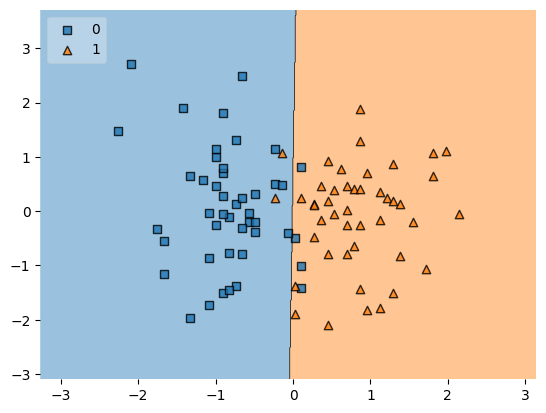

In [31]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [32]:
import pickle

In [33]:
pickle.dump(clf,open('model.pkl','wb'))